In [53]:
#from sklearn import datasets
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, Adagrad, Adadelta, Adam, RMSprop
from keras.models import Sequential
from keras.layers.core import Activation, Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D

In [54]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

<Figure size 432x288 with 0 Axes>

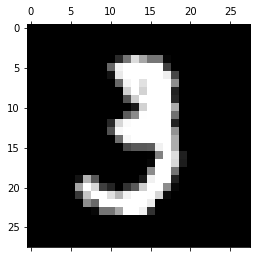

In [43]:
plt.gray()
plt.matshow(X_train[10])
plt.show()

In [44]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
X_train.shape


(60000, 28, 28, 1)

In [45]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [46]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [47]:
opt = RMSprop()

In [48]:
class Alexnet():
    
    @staticmethod
    def build(width, height, depth, classes):
        
        model = Sequential()
        # Layer 1
        model.add(Convolution2D(96, kernel_size=(11, 11), input_shape=(height, width, depth), padding='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        #Layer 2
        model.add(Convolution2D(256, kernel_size= (5, 5), padding ='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        
        #Layer 3
        model.add(ZeroPadding2D((1, 1)))
        model.add(Convolution2D(512, kernel_size=(3, 3), padding='same'))
        model.add(Activation('relu'))

        #Lyaer 4
        model.add(ZeroPadding2D((1, 1)))
        model.add(Convolution2D(1024, kernel_size=(3, 3), padding='same'))
        model.add(Activation('relu'))
        
        # Layer 5
        model.add(ZeroPadding2D((1, 1)))
        model.add(Convolution2D(1024, kernel_size=(3, 3), padding='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        
        #Layer 6
        model.add(Flatten())
        model.add(Dense(3072, init='glorot_normal'))
        model.add(Activation('relu'))
        model.add(Dropout(0.5))
        
        #Layer 7
        model.add(Dense(4096, init='glorot_normal'))
        model.add(Activation('relu'))
        model.add(Dropout(0.5))
        
        # 
        model.add(Dense(classes, init='glorot_normal'))
        model.add(Activation('softmax'))
        return model
        

In [49]:
model = Alexnet.build(width= 28, height=28, depth=1, classes=10)

print (model.summary())

c:\users\jit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3072, kernel_initializer="glorot_normal")`
c:\users\jit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:39: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4096, kernel_initializer="glorot_normal")`


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 28, 28, 96)        11712     
_________________________________________________________________
activation_29 (Activation)   (None, 28, 28, 96)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 96)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 14, 14, 256)       614656    
_________________________________________________________________
activation_30 (Activation)   (None, 14, 14, 256)       0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 256)         0         
_________________________________________________________________
zero_padding2d_10 (ZeroPaddi (None, 9, 9, 256)       

c:\users\jit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:44: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, kernel_initializer="glorot_normal")`


In [50]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


In [52]:
model.fit(X_train[0:100], y_train[0:100], batch_size=128, nb_epoch=20, verbose=1, validation_data=(X_test, y_test))

c:\users\jit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 100 samples, validate on 10000 samples
Epoch 1/20


KeyboardInterrupt: 